# Identificação do Cliente de maior valor

# 0.0. Planejamento da Solução ( IOT )

## Input - Entrada

### O problema de negócio

1. Selecionar os mais valiosos clientes para formar o programa de fidelidade **"INSIDERS"**
2. Conjunto de dados com as vendas de produtos durante 1 ano ( Nov 2015 to Dez 2017 )

## Output - Saída

1. A indicação de pessoas para fazer parte do programa de fidelidade **"INSIDERS"**.
2. Relatório com as respostas para as seguintes perguntas:
    - Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - Quantos clientes farão parte do grupo?
    - Quais as principais características desses clientes ?
    - Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Quais as condições para uma pessoa ser removida do Insiders ?
    - Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento?

## Tasks - Processo

1. **Quem são as pessoas elegíveis para participar do programa de Insiders ?**
    - O que é ser elegível ? O que é um cliente "valioso" para a empresa ?
        - Faturamento:
            - Alto Ticket Médio
            - Alto LTV
            - Baixa Recência ou Alta Frequência ( tempo entre as compras )
            - Alto Basket Size ( quantidade média de produtos comprados )
            - Baixa probabilidade de Churn
            - Previsão alta de LTV
            - Alta propensão de compra

        - Custo:
            - Baixo número de devoluções

        - Experiência:  
            - Média alta de avaliações
            
            
2. **Quantos clientes farão parte do grupo?**
    - Número de clientes
    - % em relação ao total de clients
    
    
3. **Quais as principais características desses clientes ?**
    - Escrever os principais atributos dos clientes
        - Idade
        - País
        - Salário
        
    - Escrever os principais comportamentos de compra dos clients ( métricas de negócio )
        - Vide acima
    
    
4. **Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?**
    - Calcular o faturamento total da empresa durante o ano.
    - Calcular o faturamento (%) apenas do cluster Insiders.
    
    
5. **Qual a expectativa de faturamento desse grupo para os próximos meses ?**
    - Cálculo do LTV do grupo Insiders
    - Séries Temporais ( ARMA, ARIMA, HoltWinter, etc )
    

6. **Quais as condições para uma pessoa ser elegível ao Insiders ?**
    - Qual o período de avaliação ?
    - O "desempenho" do cliente está próximo da média do cluster Insiders. 
    
    
7. **Quais as condições para uma pessoa ser removida do Insiders ?**
    - O "desempenho" do cliente não está mais próximo da média do cluster Insiders. 
    
    
8. **Qual a garantia que o programa Insiders é melhor que o restante da base ?**
    - Teste de Hipóteses
    - Teste A/B
    
    
9. **Quais ações o time de marketing pode realizar para aumentar o faturamento?**
    - Descontos
    - Preferências de escolha
    - Produtos exclusivos

## <font color='red'> Proximos Passos </font>

### Ciclo 01 - Finalizado

1. Feature Engineering
    - Recência
    - Frequência
    - Monetização
 
 
2. Métricas de validação de Clustering
    - WSS ( Within-Cluster Sum of Square )
    - SS ( Silhouette Score )


2. Cluster Analysis
    - Plot 3D
    - Cluster Profile

### Ciclo 02 - Finalizado

1. Feature Engineering
    - Average Ticket


2. Análise de Silhouette
    - Silhouette Analysis  


3. Cluster Visualization
    - UMAP


4. Cluster Análise de Perfil
    - Descrição dos centróides dos cluster

### Ciclo 03 - Finalizado

1. Análise Descritiva
    - Atributos numéricos
    - Atributos categóricos


2. Feature Engineering
    - Average Recency
    - Number of Returns


3. Data preparation
    - Standard Scaler

### Ciclo 04 Finalizado
1. Substituir os dados flatantos
    - Planejamento de recuperação de 25% dos clientes faltantes.
    - Execução do plano sobre os dados faltantes.
    
    
2. Criação de features diretas.

3. Iniciado com EDA.

### Ciclo 05 Finalizado

1. Análise exploratória - EDA
    - Análise univariada.
    - Análise Bivariada.

### Ciclo 06 Finalizado

1. Estudo do Espaço
    - PCA
    - UMAP
    - T-SNE
    - Tree-Based Embedding
    
    
2. Preparação dos Dados
    - Scaler
    


### <font color='red'> Para fazer </font>

# 0.1. Imports

In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sns
import inflection
import umap.umap_ as umap
import re

from matplotlib import pyplot as plt
from IPython.display import HTML
from sklearn import cluster as c
from sklearn import metrics as m
from sklearn import preprocessing as pp
from sklearn import decomposition as dd
from sklearn import ensemble as en
from sklearn.manifold import TSNE
from plotly import express as px
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import mixture as mx
from scipy.cluster import hierarchy as hc

## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'ggplot')
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Load dataset

In [3]:
# Carregando dados
df_raw = pd.read_csv( '../data/raw/Ecommerce.csv')

In [4]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# 1.0. Descrição dos Dados

In [5]:
df1 = df_raw.copy()

## 1.1. Renomear Colunas

In [6]:
snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, df_raw.columns))

df1.columns = cols_new

df1.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

## 1.2. Dimensões dos dados

In [7]:
print(f'Número de linhas: {df1.shape[0]}')
print(f'Número de Atributos: {df1.shape[1]}')

Número de linhas: 541909
Número de Atributos: 8


## 1.3. Tipo dos Dados

In [8]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4. Check NA

In [9]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5. Replace NA

In [10]:
df_missing = df1.loc[df1['customer_id'].isna(), :]
df_not_missing = df1.loc[~df1['customer_id'].isna(), :]

In [11]:
# Atribui um código sequencial quando customer_id está nulo.
df_backup = pd.DataFrame( df_missing['invoice_no'].drop_duplicates() )
df_backup['customer_id'] = np.arange( 1900, 1900 + len( df_backup ), 1 )

# Merge com o dataframe original
df1 = pd.merge( df1, df_backup, on='invoice_no', how='left')

# Coalesce
df1['customer_id'] = df1['customer_id_x'].combine_first( df1['customer_id_y'] )

# Drop colunas temporárias
df1 = df1.drop( columns=['customer_id_x', 'customer_id_y'], axis=1)

df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,United Kingdom,17850.0


In [12]:
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

## 1.6. Mudança de DataType

In [13]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,United Kingdom,17850.0


In [14]:
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], format='%d-%b-%y' )

In [15]:
df1['customer_id'] = df1['customer_id'].astype( int )

In [16]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int32
dtype: object

## 1.7. Estatística Descritiva

In [17]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'])
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1. Atributos Numéricos

In [18]:
num_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
unit_price,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0


### <font color='red'> 1.7.1.1. Atributos Numéricos - Investigar </font>

1. Quantidade negativa ( pode ser devolução? )
2. preço unitário igual a zero. ( pode ser promoção ou bonificação? )

### 1.7.2. Atributos Categóriocos

In [19]:
cat_attributes.head()

,invoice_no,stock_code,description,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,17850


#### Invoice No

In [20]:
# identificar se tem caracter no invoice_no
df_char_invoice = df1.loc[df1['invoice_no'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), :]

char_invoice_total = df_char_invoice.shape[0]
negative_char_invoice = df_char_invoice[df_char_invoice['quantity'] < 0].shape[0]

print( f'Qt Negativa : {negative_char_invoice} \nCom Caracter: {char_invoice_total} ' )

Qt Negativa : 9288 
Com Caracter: 9291 


#### Stock code

In [21]:
# Identifica stock_code com apenas caracteres.
stock_only_char = cat_attributes.loc[cat_attributes['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-z]+$', x ) ) ), 'stock_code'].unique()
stock_only_char

# Ação:
# Remover stock_code in ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

#### Description

In [22]:
df1.head()

# Ação:
# Deletar description, pois aparentemente não tem influência no fenomeno.

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


#### Country

In [23]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [24]:
df1['country'].value_counts( normalize=True ).head()

United Kingdom    0.914320
Germany           0.017521
France            0.015790
EIRE              0.015124
Spain             0.004674
Name: country, dtype: float64

In [25]:
df1[['customer_id', 'country']].drop_duplicates().groupby( 'country' ).count().reset_index().sort_values( 'customer_id', ascending=False).head()

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31


# 2.0. Filtragem de Variáveis
Adicionado a filtragem de variáveis antes do Feature engeneering pois como tem valores que precisavam ser tratados, o erro seria apenas propagado.

In [26]:
df2 = df1.copy()

In [27]:
## -> Atributos numéricos
# Unit Price > 0.0
df2 = df2[df2['unit_price'] > 0.04]

# Stock code != ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK']
df2 = df2[~df2['stock_code'].isin( ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK'] )]

# Description
df2 = df2.drop( columns='description', axis=1 )

# Map
df2 = df2[~df2['country'].isin( ['European Comunity', 'Unspicified' ] )]

# usuários com comportamentos fora do esperado.
df2 = df2[~df2['customer_id'].isin( [16446] )]

# Quantidade - Números negativos
df2_returns = df2[df2['quantity'] < 0]
df2_purchases = df2[df2['quantity'] > 0]

In [28]:
df2_returns.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
154,C536383,35004C,-1,2016-11-29,4.65,United Kingdom,15311
235,C536391,22556,-12,2016-11-29,1.65,United Kingdom,17548
236,C536391,21984,-24,2016-11-29,0.29,United Kingdom,17548
237,C536391,21983,-24,2016-11-29,0.29,United Kingdom,17548
238,C536391,21980,-24,2016-11-29,0.29,United Kingdom,17548


# 3.0. Feature Engineering

In [29]:
# Idéias de Features
## Média móvel - 7d, 14d, 30d
## Quantidade de compras por mês, antes do dia 15 e depois do dia 15, ou por semana.
## Média referene ao financeiro
## Basket size

In [30]:
df3 = df2.copy()

## 3.1. Criação de features

In [31]:
df_ref = df3[['customer_id']].drop_duplicates( ignore_index=True )
df_ref.shape

(5796, 1)

### 3.1.1. Gross Revenue - Faturamento

In [32]:
# Gross Revenue - Faturamento
df2_purchases.loc[:, 'gross_revenue'] = df2_purchases.loc[:, 'quantity'] * df2_purchases.loc[:, 'unit_price']

# Monetary
df_monetary = df2_purchases.loc[ : , ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left')

C:\Users\laurivan\anaconda3\envs\dsEmProducao\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [33]:
df_ref.head()

,customer_id,gross_revenue
0,17850,5391.21
1,13047,3232.59
2,12583,6705.38
3,13748,948.25
4,15100,876.00


### 3.1.2. Recency - Dias da última compra

In [34]:
# Recência - Últimno dia com compra
df_recency = ( df2_purchases.loc[ : , ['customer_id', 'invoice_date']].groupby( 'customer_id' )
                                                                      .max()
                                                                      .reset_index() )

df_recency['recency_days'] = ( df2_purchases['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()

df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left')

### 3.1.3. Quantidade de compras efetuadas

In [35]:
# Número de vendas efetuadas
df_freq = (df2_purchases[['customer_id', 'invoice_no']].drop_duplicates()
                                                      .groupby( 'customer_id' )
                                                      .count()
                                                      .reset_index()
                                                      .rename( columns={'invoice_no': 'qtde_invoices'}))

df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left')

In [36]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtde_invoices
0,17850,5391.21,372.0,34.0
1,13047,3232.59,56.0,9.0
2,12583,6705.38,2.0,15.0
3,13748,948.25,95.0,5.0
4,15100,876.00,333.0,3.0


### 3.1.4. Quantidade total de produtos comprados

In [37]:
# Quantidade de produtos comprados por cliente.
df_freq = ( df2_purchases[['customer_id', 'quantity']].groupby( 'customer_id' )
                                                     .sum()
                                                     .reset_index()
                                                     .rename( columns={'quantity':'qtde_items' } ) )

df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left')
df_ref.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items
0,17850,5391.21,372.0,34.0,1733.0
1,13047,3232.59,56.0,9.0,1390.0
2,12583,6705.38,2.0,15.0,5028.0
3,13748,948.25,95.0,5.0,439.0
4,15100,876.00,333.0,3.0,80.0


### 3.1.5. Quantidade de produtos comprados

In [38]:
# Numero de produtos
df_freq = (df2_purchases.loc[:, ['customer_id', 'stock_code']].groupby( 'customer_id' )
                                                              .count()
                                                              .reset_index()
                                                              .rename( columns={'stock_code': 'qtde_products'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
qtde_products    91
dtype: int64

### 3.1.6. Averange Ticket Value - Ticket Médio

In [39]:
# Ticket médio
df_avg_ticket = ( df2_purchases[['customer_id', 'gross_revenue']].groupby( 'customer_id' )
                                                                 .mean()
                                                                 .reset_index()
                                                                 .rename( columns={'gross_revenue': 'avg_ticket'} ) )

df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')

### 3.1.7. Averange Recency Days - Média Intervalo de Compra

In [40]:
# Média do intervalo de compra
df_aux = df2[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=['False', 'False'] )
# Próximo Cliente
df_aux['next_customer_id'] = df_aux['customer_id'].shift()
# Próxima Data
df_aux['previous_date'] = df_aux['invoice_date'].shift()

df_aux['avg_recency_days'] = df_aux.apply( lambda x: ( x['invoice_date'] - x['previous_date'] ).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1 )

df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'previous_date'], axis=1 ).dropna()

# average recency 
df_avg_recency_days = df_aux.groupby( 'customer_id' ).mean().reset_index()

# merge
df_ref = pd.merge( df_ref, df_avg_recency_days, on='customer_id', how='left' )

df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2822
dtype: int64

### 3.1.8. Frequência de Compra

In [41]:
df_aux = ( df2[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                             .groupby( 'customer_id')
                                                             .agg( max_ = ( 'invoice_date', 'max' ), 
                                                                   min_ = ( 'invoice_date', 'min' ),
                                                                   days_= ( 'invoice_date', lambda x: ( ( x.max() - x.min() ).days ) + 1 ),
                                                                   buy_ = ( 'invoice_no', 'count' ) ) ).reset_index()

# Frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if  x['days_'] != 0 else 0, axis=1 )

# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left' )

df_ref.isna().sum()    

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2822
frequency              0
dtype: int64

### 3.1.9. Devoluções

In [42]:
# # Número de devoluções
# df_returns = df2_returns[['customer_id', 'invoice_no']].groupby( 'customer_id' ).count().reset_index().rename( columns={'invoice_no': 'returns'})
# df_ref = pd.merge( df_ref, df_returns, on='customer_id', how='left')
# df_ref.loc[df_ref['returns'].isna(), 'returns'] = 0

In [43]:
# Soma quantidade de devoluções
df_returns = ( df2_returns[['customer_id', 'quantity']].groupby( 'customer_id' )
                                                       .sum()
                                                       .reset_index()
                                                       .rename( columns={'quantity': 'qtde_returns'} ) )

df_returns['qtde_returns'] = df_returns['qtde_returns'] * -1

df_ref = pd.merge( df_ref, df_returns, on='customer_id', how='left')
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0

df_ref.isna().sum()  

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2822
frequency              0
qtde_returns           0
dtype: int64

### 3.1.10. Basket Size - Quantidade de Itens por Cesta - Quantity
- Invoice no = compra = purchase
- stock code = Produto = Product
- Quantity = Item = Item

In [44]:
df_aux = ( df2_purchases.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby( 'customer_id' )
                                                                          .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                n_products=( 'quantity', 'sum' ) )
                                                                          .reset_index() )

# Cálculo média
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2822
frequency              0
qtde_returns           0
avg_basket_size       91
dtype: int64

### 3.1.11. Unique Basket Size - Quantidade de produtos distintos por compra
- Ver se realmente é a melhor forma de calcular esta feature e qual o retorno dela

In [45]:
 df_aux = ( df2_purchases.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby( 'customer_id' )
                                                                             .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                    n_products=( 'stock_code', 'nunique' ) )
                                                                             .reset_index() )

# calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id' )

df_ref.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qtde_invoices               91
qtde_items                  91
qtde_products               91
avg_ticket                  91
avg_recency_days          2822
frequency                    0
qtde_returns                 0
avg_basket_size             91
avg_unique_basket_size      91
dtype: int64

In [46]:
df_ref.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qtde_invoices               91
qtde_items                  91
qtde_products               91
avg_ticket                  91
avg_recency_days          2822
frequency                    0
qtde_returns                 0
avg_basket_size             91
avg_unique_basket_size      91
dtype: int64

In [47]:
# df_ref = df3[['customer_id']].drop_duplicates( ignore_index=True )
# # Gross Revenue - Faturamento
# df3['gross_revenue'] = df3['quantity'] * df3['unit_price']

# # Monetary
# df_monetary = df3[['customer_id', 'gross_revenue']].groupby( 'customer_id' ).sum().reset_index()
# df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left')

# # Recência - Últimno dia com compra
# df_recency = df3[['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
# df_recency['recency_days'] = ( df3['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
# df_recency = df_recency[['customer_id', 'recency_days']].copy()
# df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left')

# # Frequência
# df_freq = df3[['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count().reset_index()
# df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left')

# # Ticket médio
# df_avg_ticket = df3[['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue': 'avg_ticket'})
# df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')

# 4.0. Análise Exploratória dos Dados - EDA

In [48]:
df4 = df_ref.dropna().copy()
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qtde_invoices             0
qtde_items                0
qtde_products             0
avg_ticket                0
avg_recency_days          0
frequency                 0
qtde_returns              0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

## Sweetviz

In [49]:
import sweetviz as sv

report = sv.analyze(df4)
# report.show_html()
# report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)

## Pandas Profiling

In [50]:
from pandas_profiling import ProfileReport
profile = ProfileReport( df4 )
# profile.to_file("output.html")
# profile.to_notebook_iframe()

## 4.1. Análise Univariada

### 4.1.1. Gross Revenue

In [51]:
 df4.sort_values( 'gross_revenue', ascending=False ).head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,196844.0,2060.0,135.503893,7.844444,0.206215,288.0,2733.944444,9.708333
492,18102,259657.30,0.0,60.0,64124.0,431.0,602.453132,14.680000,0.163043,0.0,1068.733333,2.500000
433,17450,194550.79,8.0,46.0,69993.0,337.0,577.302047,12.821429,0.136111,952.0,1521.586957,2.695652
66,14911,140438.72,1.0,199.0,79963.0,5670.0,24.768734,2.601399,0.651475,3332.0,401.824121,8.969849
1150,12415,124564.53,24.0,20.0,77373.0,713.0,174.704811,20.866667,0.076433,427.0,3868.650000,22.150000


In [52]:
# Como cliente 14646 tem valores altos de produtos, vou analisar se é outlier.
df4[df4['customer_id'] == 14646].head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,196844.0,2060.0,135.503893,7.844444,0.206215,288.0,2733.944444,9.708333


In [53]:
# Analisa a distribuição mais detalhada do gross_revenue.
# sns.histplot( df4['gross_revenue'], binwidth=200)

### 4.1.2. Qtde Items

In [54]:
df3[df3['customer_id'] == 14646].head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
37952,539491,21981,12,2016-12-18,0.29,Netherlands,14646
37953,539491,21986,12,2016-12-18,0.29,Netherlands,14646
37954,539491,22720,2,2016-12-18,4.95,Netherlands,14646
37955,539491,21931,1,2016-12-18,1.95,Netherlands,14646
37956,539491,22613,2,2016-12-18,0.85,Netherlands,14646


### 4.1.3. Avg Ticket

In [55]:
df4[df4['avg_ticket'] == 56157.5]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size


Cliente aparentemente comrou e cancelou, levando a um valor que pode atrapalhar o modelo.
   
   - Será necessário melhorar a abordagem de tratamento para cancelamentos/devoluções

In [56]:
df4[df4['customer_id'] == 16446]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size


## 4.2. Análise Bivariada

In [57]:
cols = ['customer_id']
df4_tmp = df4.drop( cols, axis=1 )

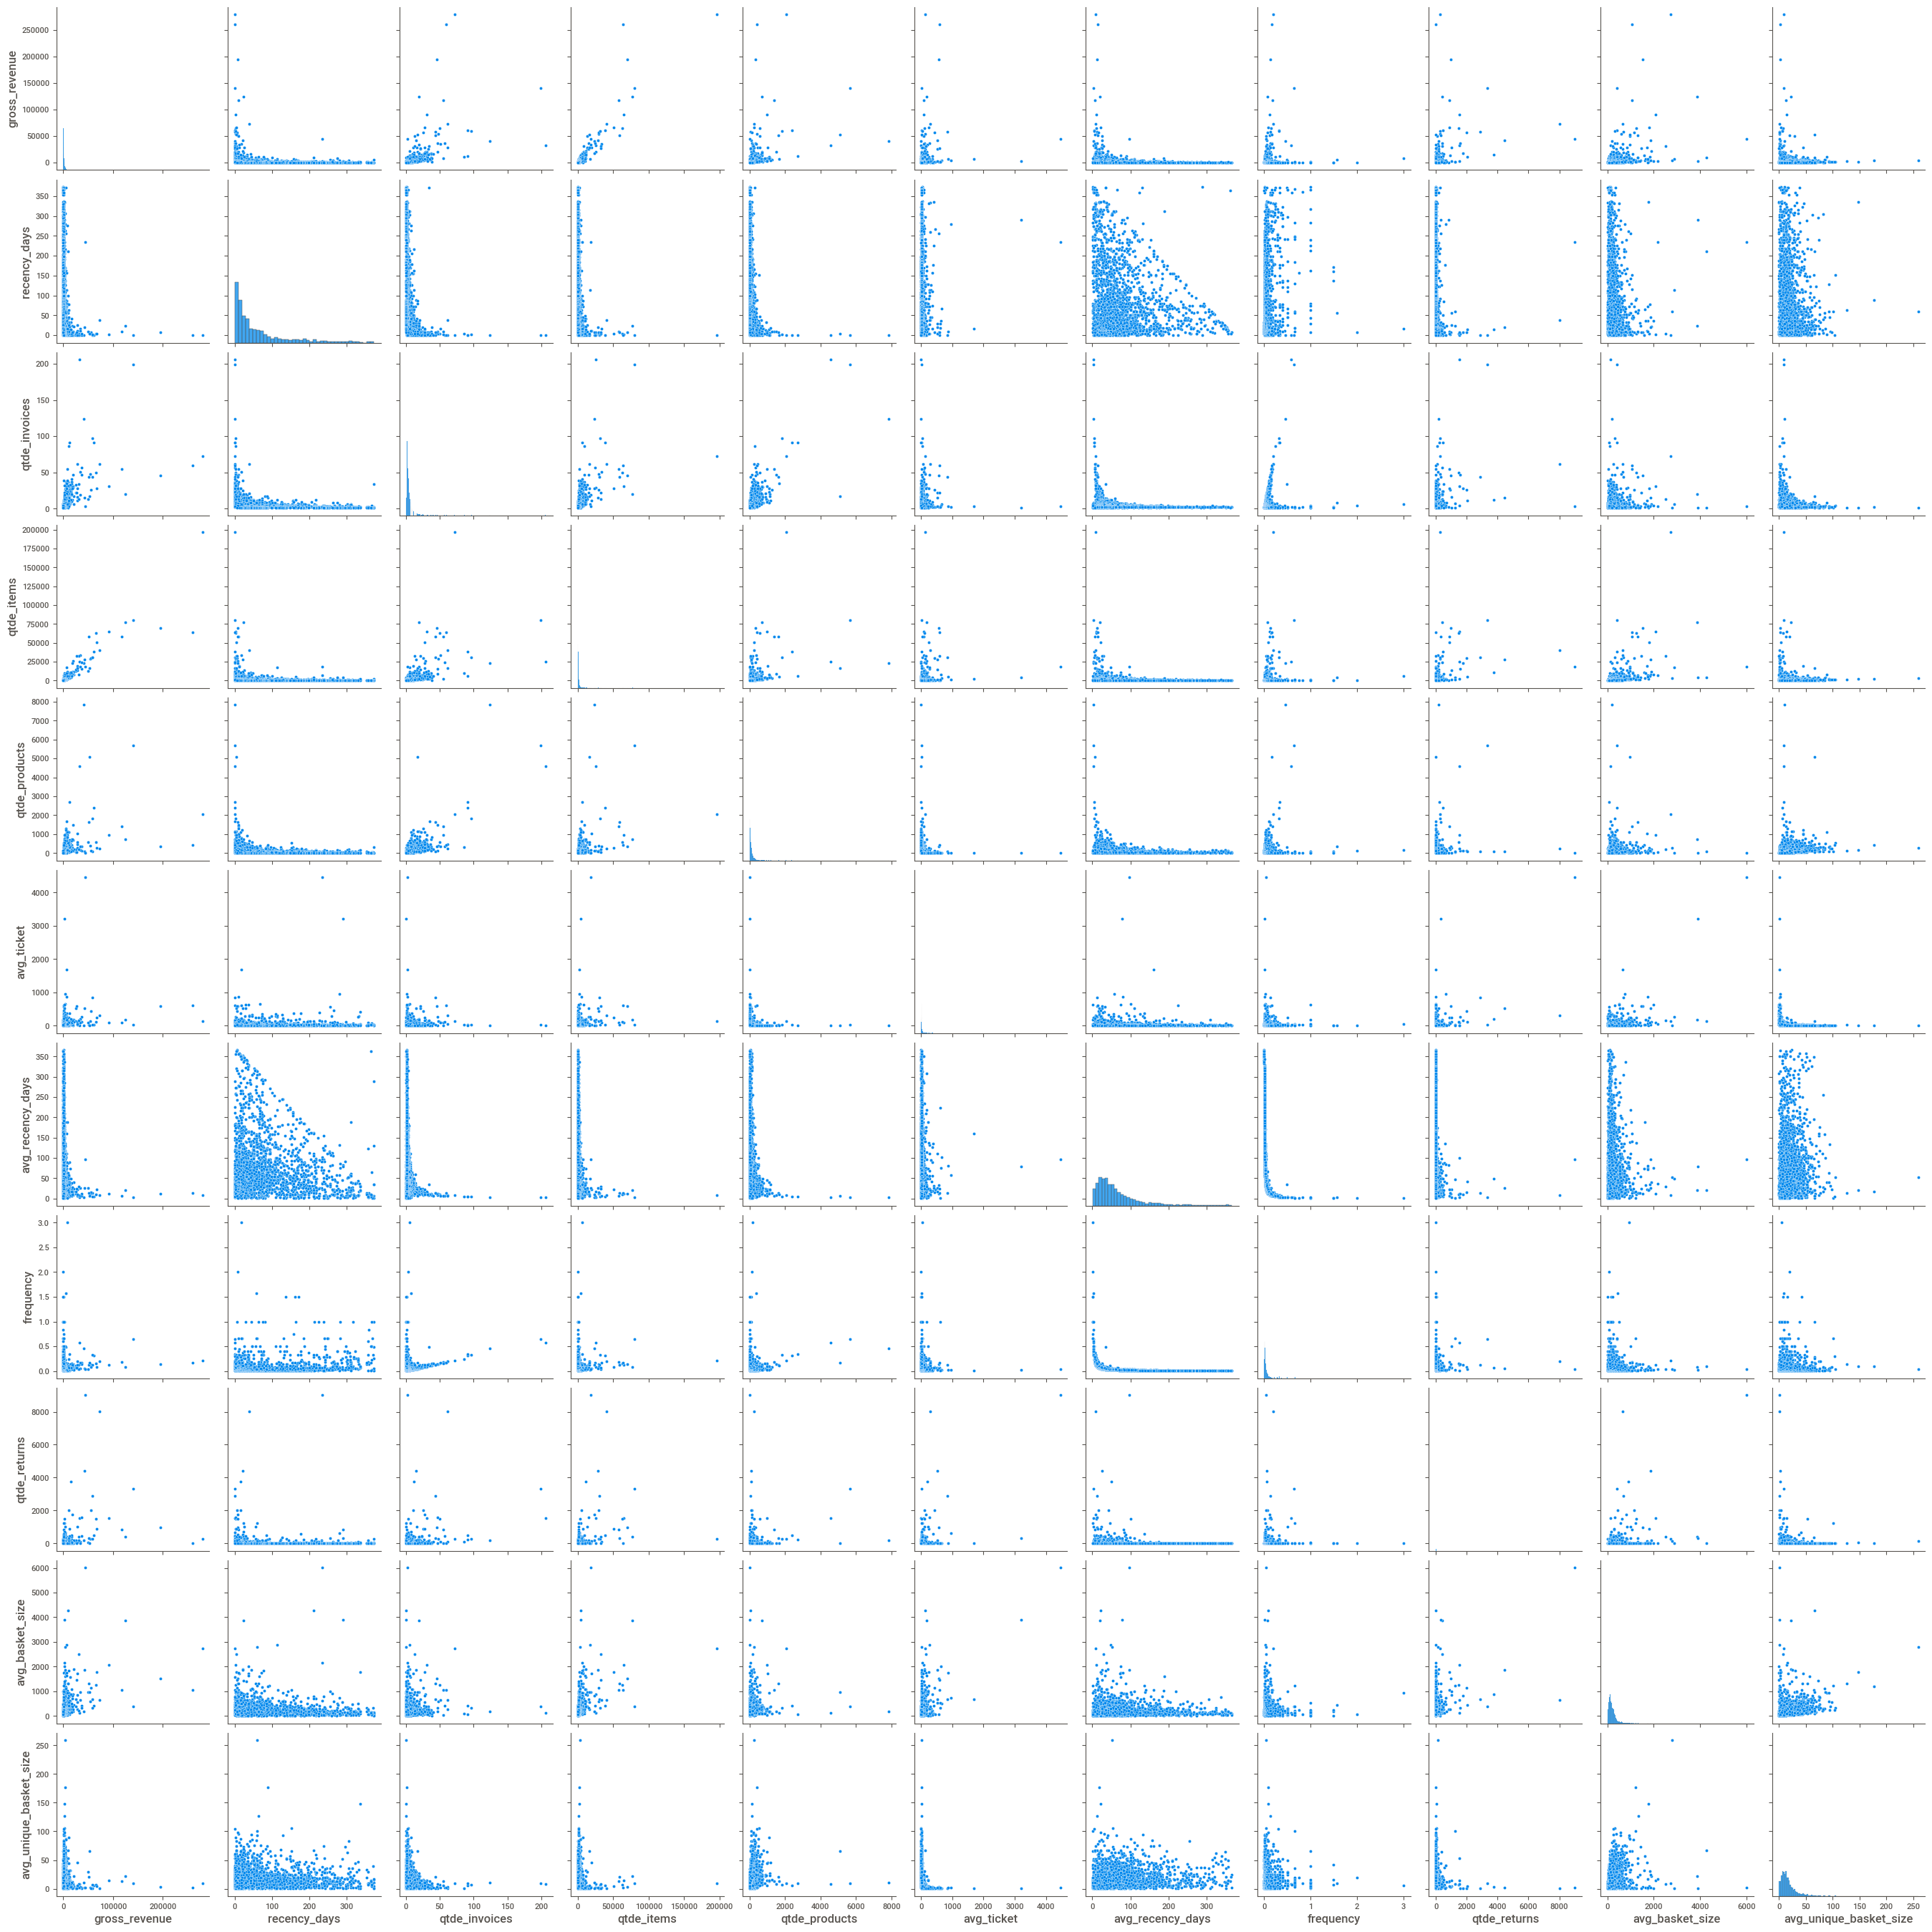

In [58]:
sns.pairplot( df4_tmp )

**Nota:**
1. Frequency com baixa variancia
2. AVG Ticket com baixa variancia

## 4.2. Análise Multivariada

## 4.3. Estudo do Espaço

In [59]:
df43 = df4.drop( columns=['customer_id'] ).copy()

In [60]:
mm = pp.MinMaxScaler()

# 
df43['gross_revenue']          = mm.fit_transform( df43[['gross_revenue']] )
df43['recency_days']           = mm.fit_transform( df43[['recency_days']] )
df43['qtde_invoices']          = mm.fit_transform( df43[['qtde_invoices']])
df43['qtde_items']             = mm.fit_transform( df43[['qtde_items']])
df43['qtde_products']          = mm.fit_transform( df43[['qtde_products']])
df43['avg_ticket']             = mm.fit_transform( df43[['avg_ticket']])
df43['avg_recency_days']       = mm.fit_transform( df43[['avg_recency_days']])
df43['frequency']              = mm.fit_transform( df43[['frequency']])
df43['qtde_returns']           = mm.fit_transform( df43[['qtde_returns']])
df43['avg_basket_size']        = mm.fit_transform( df43[['avg_basket_size']])
df43['avg_unique_basket_size'] = mm.fit_transform( df43[['avg_unique_basket_size']] )


X = df43.copy()

### 4.3.1. PCA

In [61]:
X.shape[1]

11

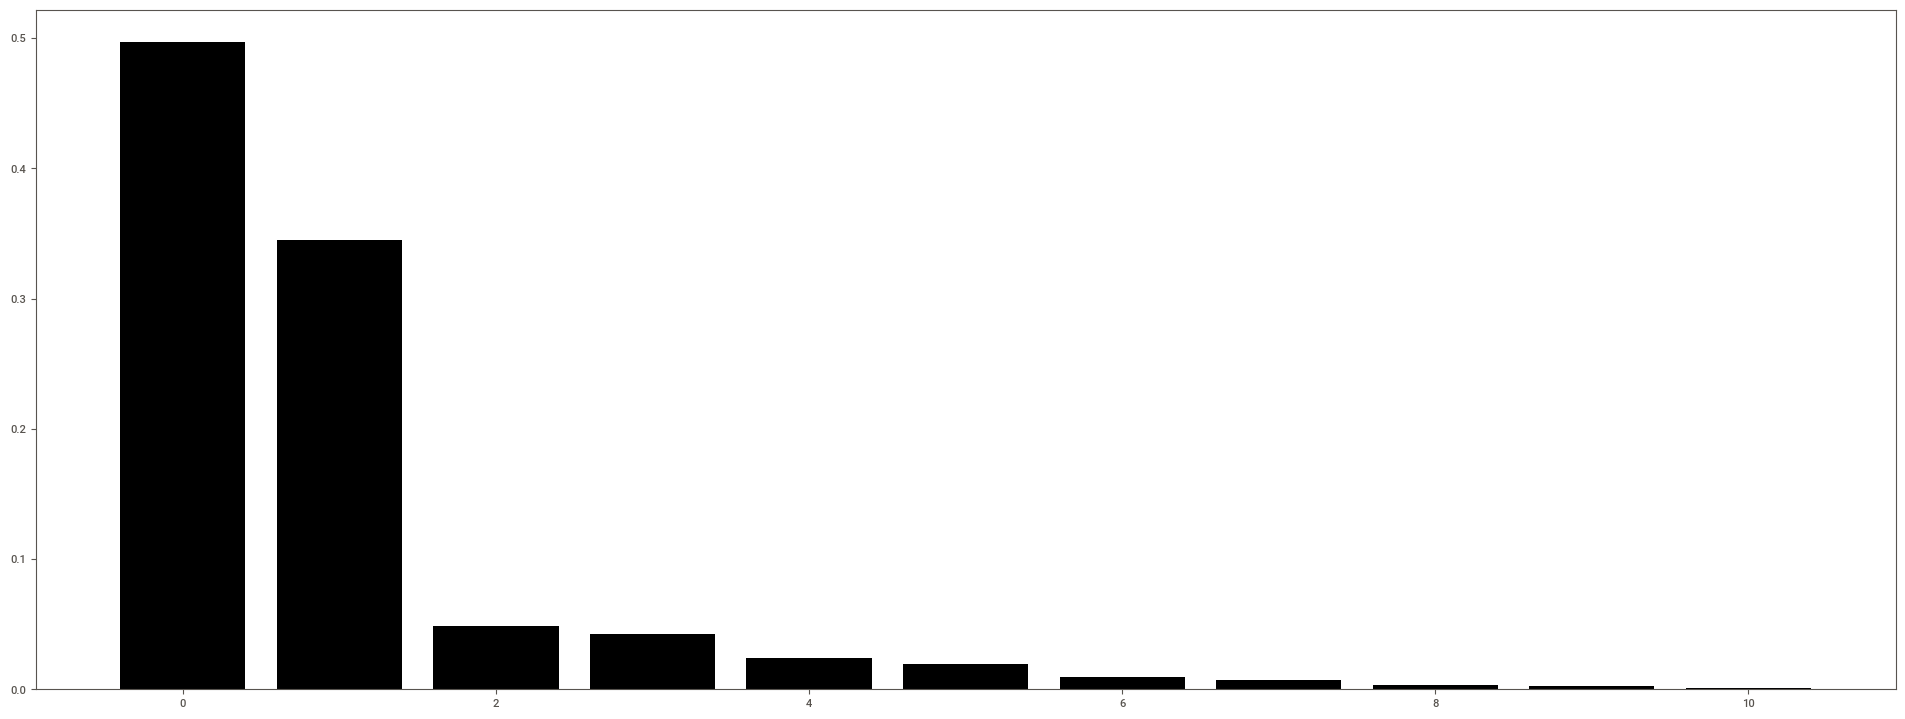

In [62]:
pca = dd.PCA( n_components=X.shape[1] )

principal_components = pca.fit_transform( X )

# plot explained variable
features = range( pca.n_components_ )

plt.bar( features, pca.explained_variance_ratio_, color='black' )

# pca component
df_pca = pd.DataFrame( principal_components )

<AxesSubplot:xlabel='0', ylabel='1'>

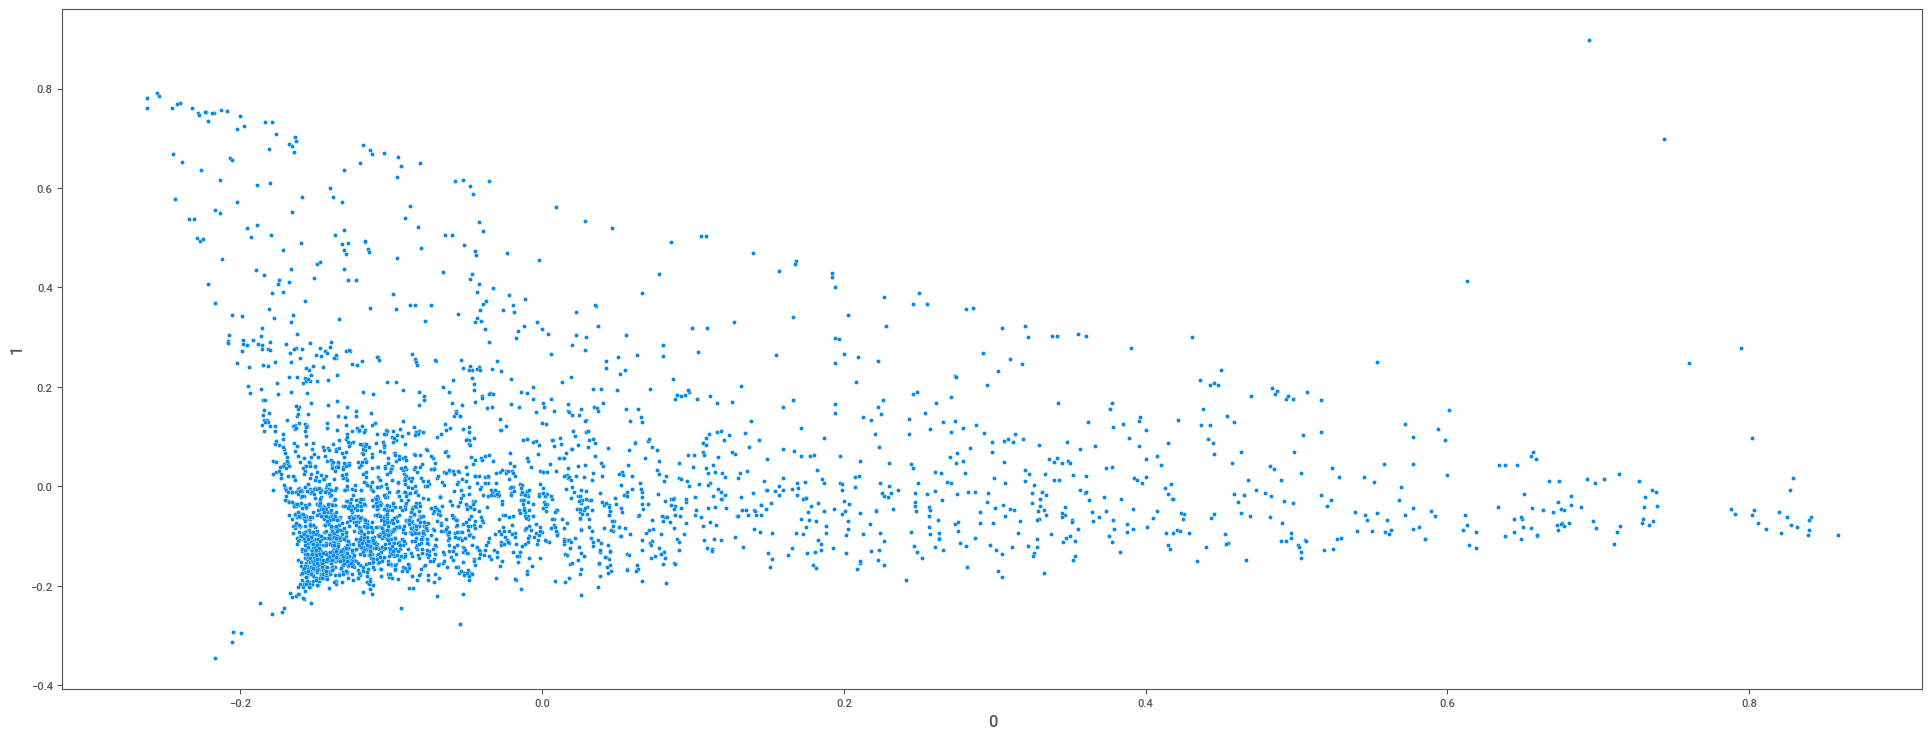

In [63]:
sns.scatterplot( x=0, y=1, data=df_pca )

### 4.3.2. UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

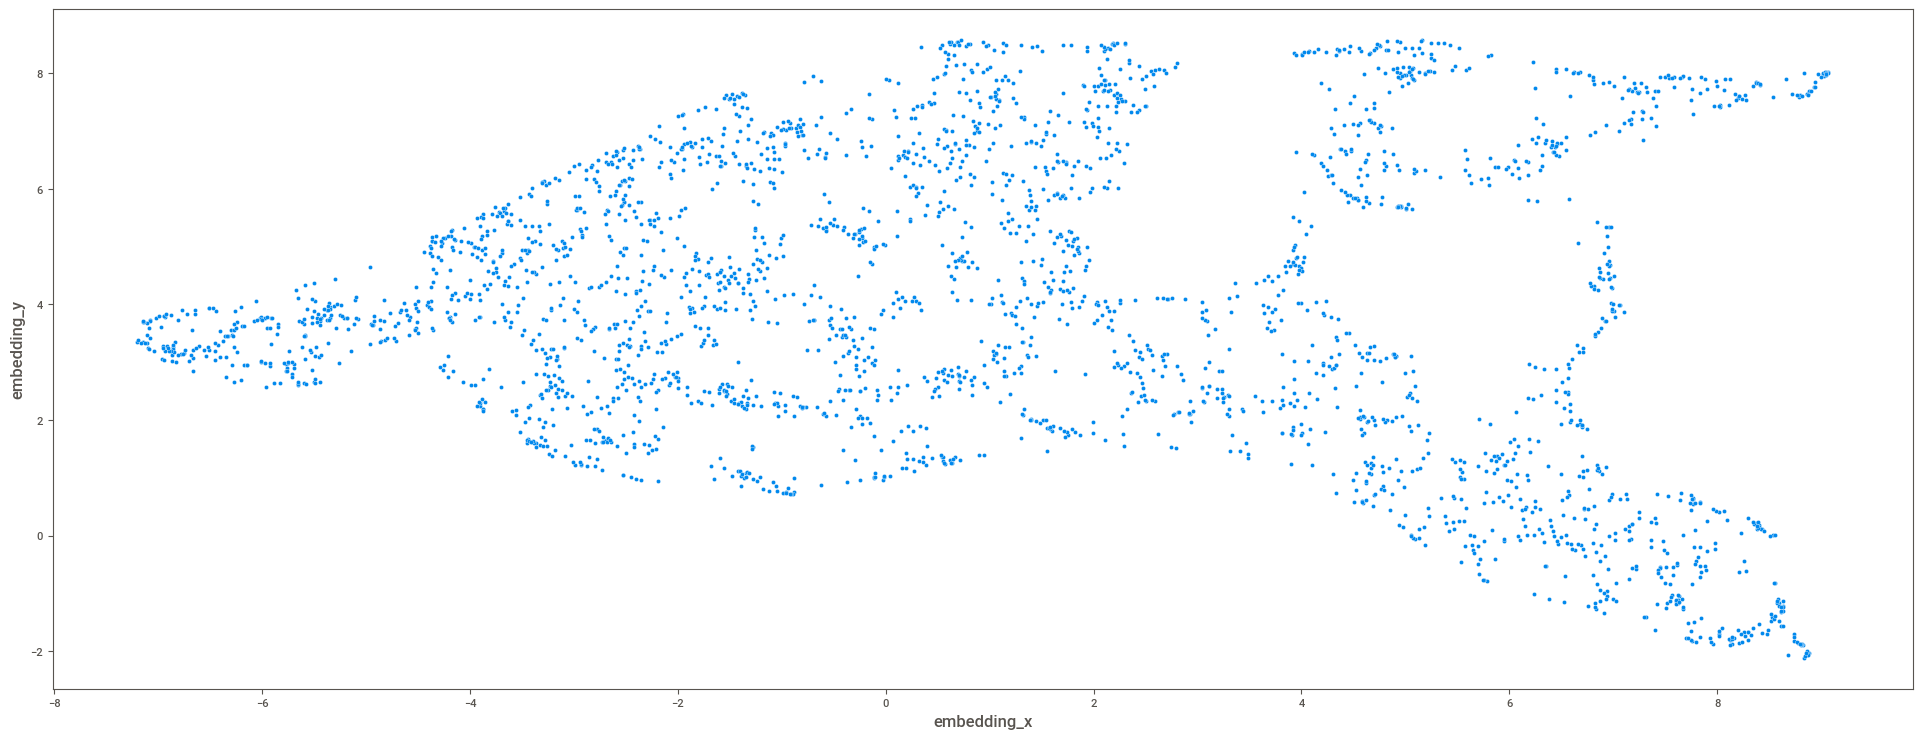

In [64]:
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', 
                 y='embedding_y', 
                 data=df_pca )

### 4.3.3. T-SNE

C:\Users\laurivan\anaconda3\envs\dsEmProducao\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\laurivan\anaconda3\envs\dsEmProducao\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

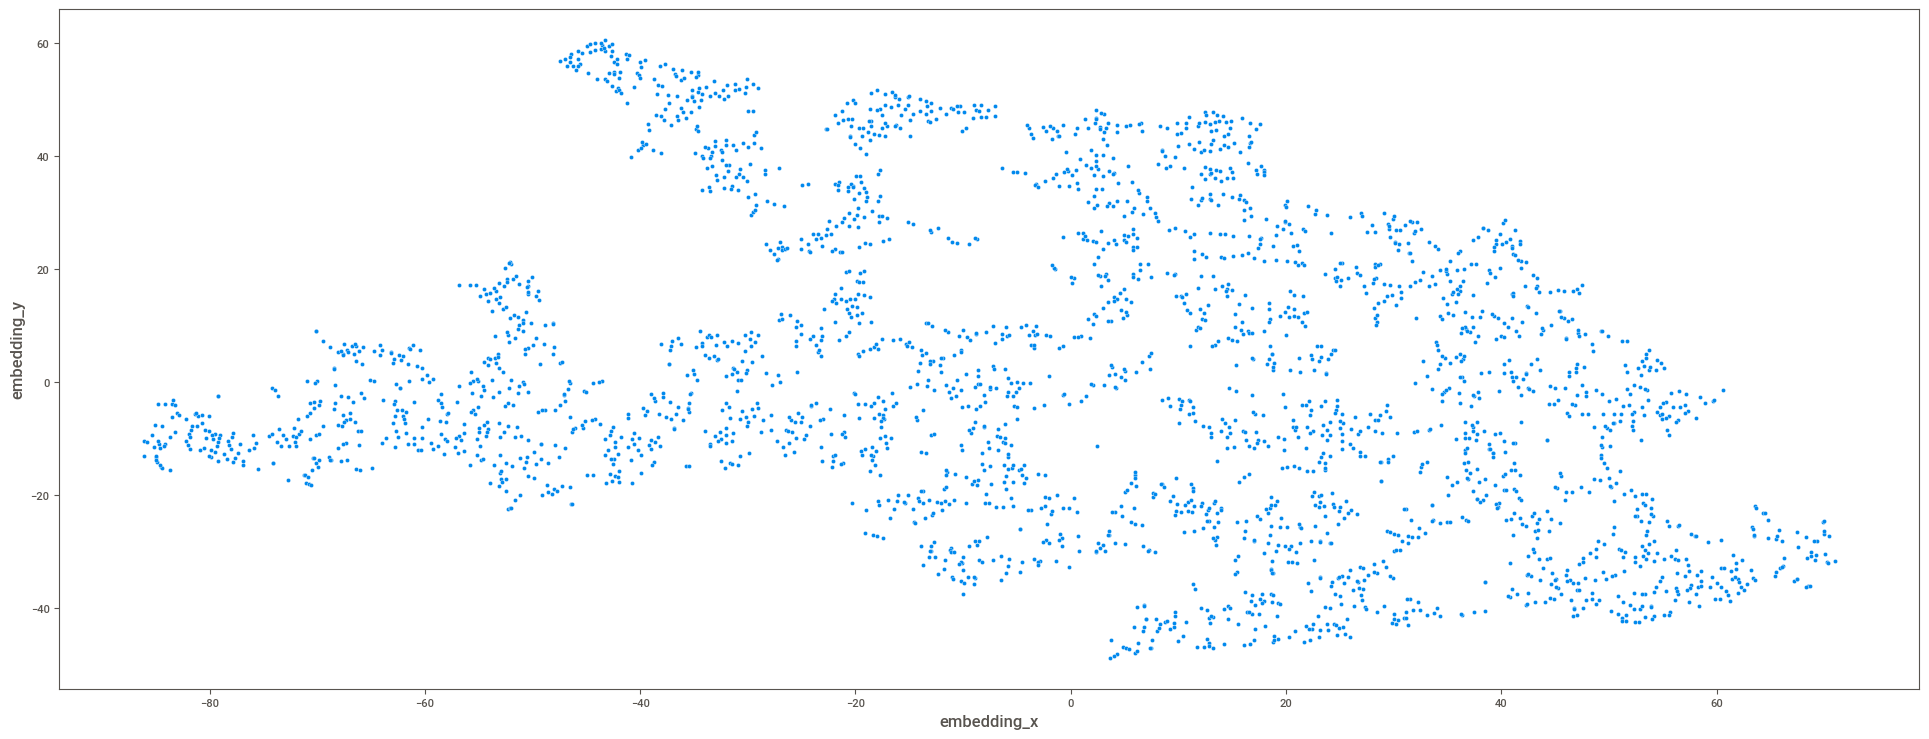

In [65]:
reducer = TSNE( n_components=2, n_jobs=-1, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', 
                 y='embedding_y', 
                 data=df_pca )

### 4.3.4. Tree-Based Embedding

In [66]:
# training dataset
X = df4.drop( columns=['customer_id', 'gross_revenue'], axis=1 )
y = df4['gross_revenue']

# model definition
rf_model = en.RandomForestRegressor( n_estimators=100, random_state=42 )

# model training
rf_model.fit( X, y )

# Leaf 

# dataframe Leaf

RandomForestRegressor(random_state=42)

In [67]:
df_leaf = pd.DataFrame( rf_model.apply( X ) )

In [68]:
X.shape

(2972, 10)

In [69]:
df_leaf.shape

(2972, 100)

In [70]:
df_leaf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,2990,2904,3400,2902,2260,3317,3258,3139,3135,3365,2729,3282,3117,3115,3123,3206,3130,3074,3087,2989,3191,3045,2915,3074,3340,3129,3086,2800,3085,3189,3327,3388,3148,3349,3056,3361,3424,3170,3097,3239,3347,3243,3191,3165,3045,3135,2823,3350,3253,3367,3201,3124,3082,3399,3324,3291,2857,3361,3109,3339,3436,3297,3066,3037,3176,3055,3305,3309,3129,3199,3357,2985,3228,3310,2800,3167,3351,3067,3201,3158,3241,3323,3349,3122,3308,3196,3355,3203,3088,3288,2930,2878,3097,3087,3448,3151,3231,3389,3362,3314
1,2956,2860,3043,2688,3032,2984,2929,2959,3080,2861,3118,2539,3093,3201,3011,3102,2794,2860,2800,2745,2740,3103,2888,3066,3019,3125,2861,3109,2872,3150,2880,2975,3060,2947,3029,2983,2941,2765,3071,2892,2678,2868,3006,3117,3032,3080,3124,2943,2945,2927,3186,3067,2938,2961,3000,2954,3152,3021,2828,2944,3010,2914,2871,2935,2848,2621,2930,2978,3092,2955,2980,2950,2923,2935,3097,2797,2926,3045,3089,3084,2845,2915,2950,2797,2942,3154,2917,3151,3100,2891,2547,2849,3052,3024,2950,3040,2890,2932,2970,2998
2,3570,3607,3594,3608,3578,3648,3636,3617,3583,3603,3601,3594,3592,3639,3533,3577,3604,3635,3530,3526,3539,3625,3659,3533,3490,3622,3526,3579,3411,3717,3460,3692,3608,3657,3584,3620,3572,3619,3600,3508,3662,3394,3690,3634,3518,3556,3604,3660,3644,3569,3632,3506,3592,3623,3669,3605,3618,3625,3543,3439,3650,3606,3593,3677,3498,3639,3655,3626,3590,3619,3585,3435,3586,3545,3621,3566,3579,3562,3578,3606,3537,3454,3615,3555,3553,3625,3585,3645,3554,3398,3601,3434,3532,3532,3610,3574,3532,3621,3471,3660
3,1431,2067,1596,1505,2176,2051,2228,1920,1203,1444,2072,2297,1534,1618,2067,1951,1859,1601,1965,1430,1862,2066,1546,1924,1280,2181,1420,1565,1863,1741,1506,1570,1372,1438,1532,1610,2181,2081,1696,1549,1538,1482,1585,1347,1260,1692,1543,1406,1765,1676,1990,1587,1503,2174,2161,1488,1700,2142,1446,2045,1267,1508,2095,1634,1865,1422,2161,1685,1761,1542,2317,1865,1459,2269,1949,2084,1427,1602,1952,1952,1948,1348,1395,1510,2068,1543,1293,2294,1518,1573,1773,2060,2086,1490,1901,2225,1279,1842,1923,2117
4,199,728,185,698,191,600,217,703,188,185,571,689,218,842,153,186,590,238,601,736,731,559,435,161,844,769,605,332,155,758,722,233,185,334,212,764,355,185,600,513,292,194,321,603,910,569,921,660,471,596,614,905,357,506,201,201,707,218,679,586,211,755,708,199,720,421,580,714,688,900,237,192,331,815,722,201,233,463,169,182,592,872,598,305,588,182,586,208,438,679,318,164,699,191,193,110,571,721,732,213


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

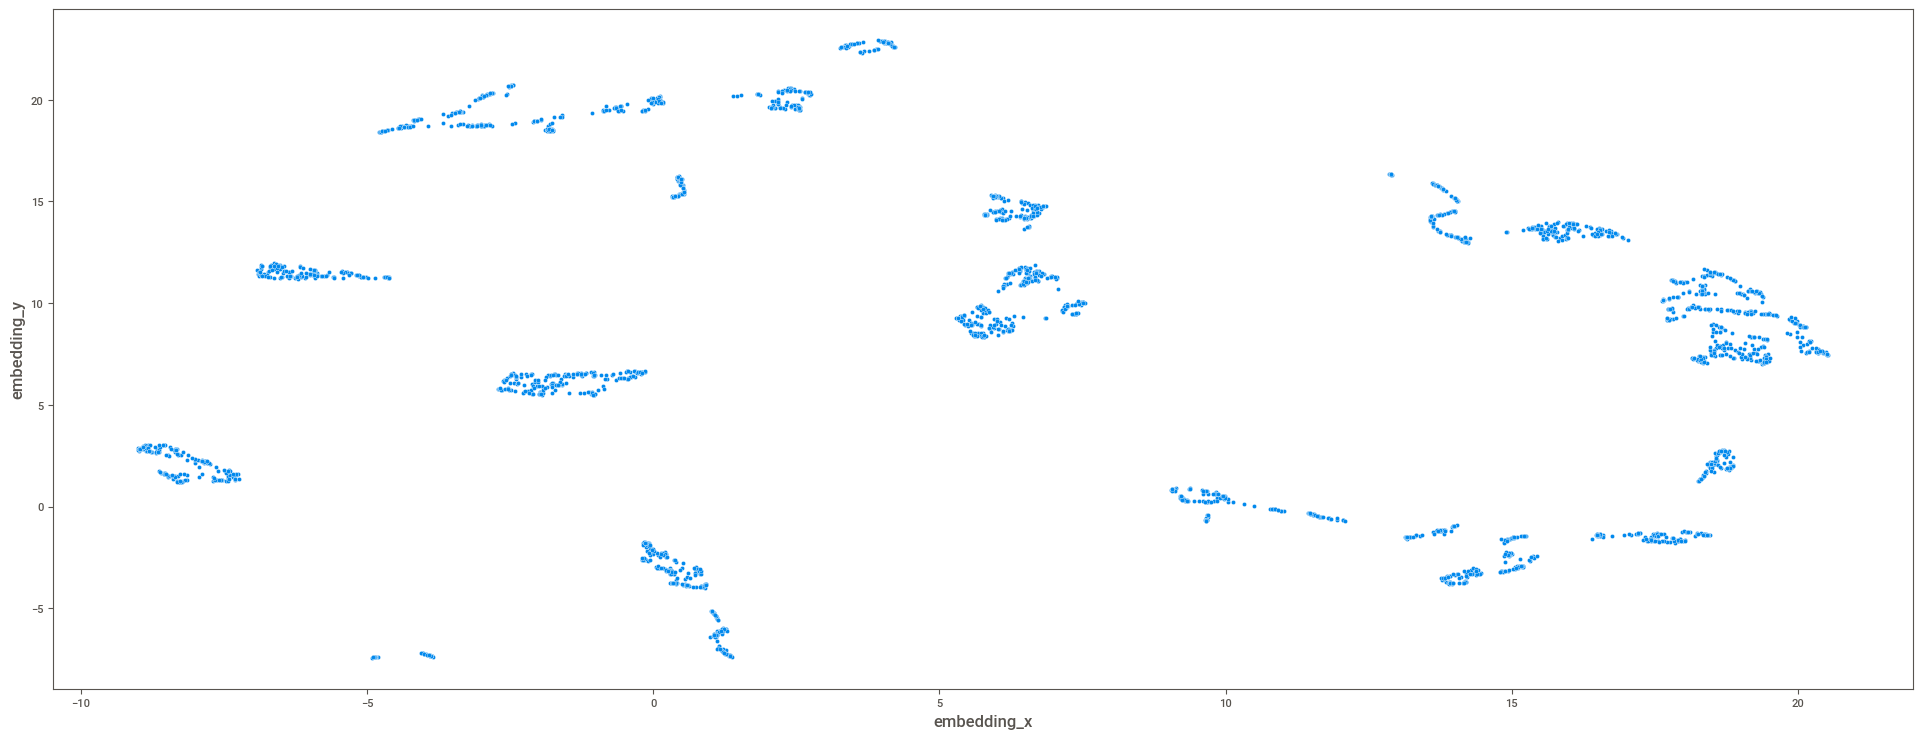

In [71]:
# Reduzer dimensionality
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( df_leaf )

# embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', 
                 y='embedding_y', 
                 data=df_pca )

# 5.0. Preparação dos Dados

In [72]:
df5 = df4.copy()

In [73]:
df5.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,35.500000,0.486111,40.0,50.970588,0.617647
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.904035,27.250000,0.048780,35.0,154.444444,11.666667
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.902500,23.187500,0.045699,50.0,335.200000,7.600000
3,13748,948.25,95.0,5.0,439.0,28.0,33.866071,92.666667,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,80.0,3.0,292.000000,8.600000,0.136364,22.0,26.666667,0.333333


## 5.1. Scaler

In [74]:
cols = list(df5.columns)
cols.remove('customer_id')
cols

['gross_revenue',
 'recency_days',
 'qtde_invoices',
 'qtde_items',
 'qtde_products',
 'avg_ticket',
 'avg_recency_days',
 'frequency',
 'qtde_returns',
 'avg_basket_size',
 'avg_unique_basket_size']

In [75]:
## Standard Scalaer
# ss = pp.StandardScaler()
minmax = pp.MinMaxScaler()

for col in cols:
    ## Standard Scalaer
#     df5[col] = ss.fit_transform( df5[[col]] )
    
    # MinMaxScaler
    df5[col] = minmax.fit_transform( df5[[col]] )

In [76]:
df5.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,0.019292,0.997319,0.160976,0.008799,0.037774,0.003595,0.094521,0.160512,0.004438,0.008317,0.001614
1,13047,0.011559,0.150134,0.039024,0.007056,0.021695,0.003764,0.071918,0.014470,0.003883,0.025539,0.044307
2,12583,0.024000,0.005362,0.068293,0.025538,0.029479,0.006010,0.060788,0.013441,0.005547,0.055623,0.028594
3,13748,0.003375,0.254692,0.019512,0.002225,0.003446,0.007125,0.251142,0.004165,0.000000,0.014447,0.017774
4,15100,0.003116,0.892761,0.009756,0.000401,0.000255,0.065116,0.020822,0.043717,0.002441,0.004272,0.000515


# 6.0. Seleção de Features

In [77]:
df6 = df5.copy()

# 7.0. Hyperparameter Fine-Tunning

In [78]:
X = df6.drop( columns=['customer_id'] )

In [79]:
clusters = [2, 3, 4, 5, 6, 7]

## 7.1. K-Means

In [80]:
kmeans_list = []

for k in clusters:
    # Definição Modelo
    kmeans_model = c.KMeans( n_clusters=k )
    
    # Treino Modelo
    kmeans_model.fit( X )
    
    # Predição
    labels = kmeans_model.predict( X )
    
    # Performance modelo
    sil = m.silhouette_score( X, labels, metric='euclidean')
    kmeans_list.append( sil )

In [81]:
kmeans_list

[0.5033162088784922,
 0.5119902687394419,
 0.3854342562026555,
 0.3499876182087876,
 0.36145478691142846,
 0.3373618498910678]

Text(0.5, 1.0, 'Sillhouetter Score x K')

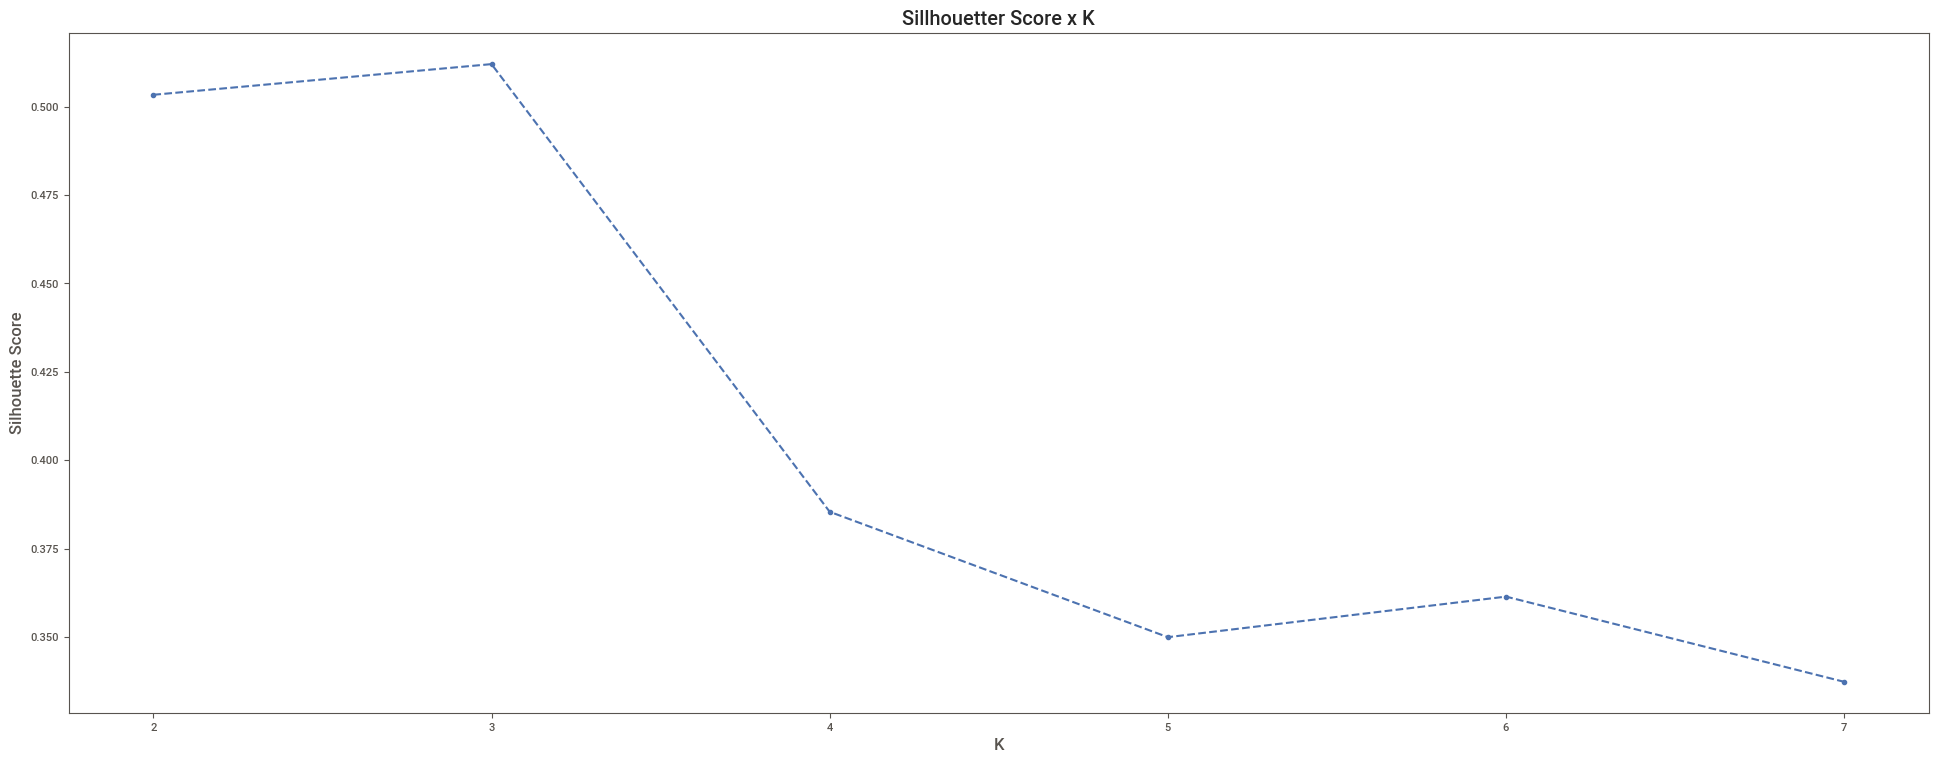

In [82]:
plt.plot( clusters, kmeans_list, linestyle='--', marker='o', color='b' )
plt.xlabel( 'K' );
plt.ylabel( 'Silhouette Score' )
plt.title( 'Sillhouetter Score x K' )

## 7.2. Gaussian Mixture Model (GMM)

In [83]:
gmm_list = []

for k in clusters:
    # Definição Modelo
    gmm_model = mx.GaussianMixture( n_components=k )
    
    # Treino Modelo
    gmm_model.fit( X )
    
    # Predict Modelo
    labels = gmm_model.predict( X )

    # Performance Modelo
    sil = m.silhouette_score( X, label, metric='euclidean' )
    gmm_list.append( sil )

FloatingPointError: underflow encountered in exp

In [ ]:
plt.plot( clusters, gmm_list, linestyle='--', marker='o', color='b' )
plt.xlabel( 'K' );
plt.ylabel( 'Silhouette Score' )
plt.title( 'Sillhouetter Score x K' )

In [ ]:
from sklearn.mixture import GaussianMixture

X2 = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
gm = GaussianMixture(n_components=2, random_state=0).fit(X2)
gm.means_
gm.predict([[0, 0], [12, 3]])

## 7.3. Hierarchical Clustering

In [ ]:
# Definição Modelo e Treino
hc_model = hc.linkage( X, 'ward' )

In [ ]:
hc.dendrogram(
    hc_model,
    leaf_rotation=90,
    leaf_font_size=8
)
plt.plot()

In [ ]:
hc.dendrogram(
    hc_model,
    truncate_mode='lastp',
    p=12,    
    leaf_rotation=90,
    leaf_font_size=8,
    show_contracted=True
)
plt.show()

### 7.3.1 HClustering Silhouette Score

In [ ]:
hc_list = []

for k in clusters:

    # Definiçaão do modelo e treino
    hc_model = hc.linkage( X, 'ward' )

    # Predict
    labels = hc.fcluster( hc_model, k, criterion='maxclust' )

    # Métricas
    sil = m.silhouette_score( X, labels, metric='euclidean')
    hc_list.append( sil )

In [ ]:
plt.plot( clusters, hc_list, linestyle='--', marker='o', color='b' )
plt.xlabel( 'K' );
plt.ylabel( 'Silhouette Score' )
plt.title( 'Sillhouetter Score x K' )

## 7.4. DBSCAN

In [ ]:
eps = 10
min_samples = 20

# Definição Modelo
dbscan_model = c.DBSCAN( eps=eps, min_samples=min_samples )

# Treino Modelo
labels = dbscan_model.fit_predict( X )

# Predict Modelo

# Performance Modelo

## 7.5. Resultados

In [ ]:
df_results = pd.DataFrame(
    {'KMeans': kmeans_list,
     'HC': hc_list,
#      'GMM': gmm_list 
    }
).T

df_results.style.highlight_max( color='lightgreen', axis=1)

## 7.1. Within-Cluster Sum of Square (WSS)

In [ ]:
wss = []

for k in clusters:
    # Model Definition
    kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    
    # model taining
    kmeans.fit( X )
    
    # Validation
    wss.append( kmeans.inertia_ )
    
# plot wss

plt.figure(figsize=(14,7))
plt.plot( clusters, wss, linestyle='--', marker='o', color='b' )
plt.xlabel( 'K')
plt.ylabel( 'Within-Cluster Sum of Square' )
plt.title( 'WSS vs K')

## 7.2. Elbow

In [ ]:
plt.figure(figsize=(14,7))
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False)
kmeans.fit( X )
kmeans.show()

## 7.3. Silhouette Score

In [ ]:
plt.figure(figsize=(14,7))
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, metric='silhouette', timings=False)
kmeans.fit( X )
kmeans.show()

## 7.4. Silhouette Analysis

Implementar nos proximos ciclos https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [ ]:
# Para identificar qual a melhor quantidade de clusters vamos plotar a silhouette de cada um e fazer uma análise visual.

fig, ax = plt.subplots( 3, 2, figsize=(25, 18) )

for k in clusters:
    km = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=100, random_state=42)
    
    q, mod = divmod( k, 2 )
    visualizer = SilhouetteVisualizer( km, color='yellowbrick', ax=ax[q-1][mod] )
    visualizer.fit( X )
    visualizer.finalize()

# 8.0. Modelagem de Machine Learning

## 8.1. K-Means

In [ ]:
k = 3

# Model Definition
kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

# model taining
kmeans.fit( X )

# clustering
labels = kmeans.labels_

## 8.2. Cluster Validation

In [ ]:
print( f'WSS Value: {kmeans.inertia_}' )
print( 'SS Value: {}'.format( m.silhouette_score( X, labels, metric='euclidean') ) )

# 9.0. Análise dos clusters

In [ ]:
df9 = df6.copy()
df9['cluster'] = labels

In [ ]:
df9.columns


## 9.1. Silhouette

In [ ]:
visualizer = SilhouetteVisualizer( kmeans, color='yellowbrick' )
visualizer.fit( X )
visualizer.finalize()

## 9.2. 2d Plot

In [ ]:
df9['cluster'].value_counts(normalize=True) * 100

In [ ]:
# plt.figure( figsize=(35, 18) )
df_viz = df9.drop( columns='customer_id', axis=1 )
sns.pairplot( df_viz, hue='cluster' )

## 9.3. UMAP

In [ ]:
reducer = umap.UMAP( n_neighbors=20, random_state=42 )
embedding = reducer.fit_transform( X )

# Embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# Plot UMAP
plt.figure( figsize=(11, 7) )
sns.scatterplot( x='embedding_x', 
                y='embedding_y',
               hue='cluster',
               palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ),
               data=df_viz)

## 9.4. Inspeção Visual

In [ ]:
# Esta inspeção serve para quado temos 3 dimensões
# df_tmp = df9[['recency_days', 'invoice_no', 'gross_revenue', 'cluster']]
fig = px.scatter_3d( df9, x='recency_days', y='invoice_no', z='gross_revenue', color='cluster')
# fig.show()

## 9.5. Perfil do Cluster

In [ ]:
# Número de clientes
df_cluster = df9[['customer_id', 'cluster']].groupby( 'cluster' ).count().reset_index()
df_cluster['perc_customer'] =  100 * ( df_cluster['customer_id'] / df_cluster['customer_id'].sum() )

# Média Faturamento
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_gross_revenue, on='cluster', how='inner')

# Média Recencia
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_recency_days, on='cluster', how='inner')

# Média compras
df_avg_invoice_no = df9[['invoice_no', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_invoice_no, on='cluster', how='inner')

# Média ticket
df_avg_ticket = df9[['avg_ticket', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_ticket, on='cluster', how='inner')

In [ ]:
df_cluster.head()

In [ ]:
## df9[['customer_id', 'cluster']]['cluster'].value_counts(normalize=True) * 100

### Cluster 01: (candidato à Insider)
- Número de Clientes: 6 (0,14%)
- Recência média: 7 Dias
- Compras Média: 89 Compras
- Receita média: $ 182.182,00 Dólares

### Cluster 02:
- Número de Clientes: 31 (99%)
- Recência média: 14 Dias
- Compras Média: 53 Compras
- Receita média: $ 40.543,52 Dólares

### Cluster 03: 
- Número de Clientes: 4.335 (99%)
- Recência média: 92 Dias
- Compras Média: 5 Compras
- Receita média: $ 1.372,57 Dólares

# 10.0. Deploy Modelo em Produção